In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import *

# Handling text 2 exercise
[Handling text exercisses ADApted drom ADA 2018 final exam]

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Task A: Picking up the shovel

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [15]:
a, b = [1, 2]

In [53]:
# your code goes here

data = []

with open(r'./data/all_scripts.txt', "r", encoding="utf-8") as file:
    all_scripts = file.read()
    
for episode_data in all_scripts.split(">> "):
    if episode_data == "":
        continue
    episode_name = episode_data.split("\n")[0]
    print(episode_name)
    for scene_data in episode_data.split("\n>"):
        if scene_data == "":
            continue
        dialogues = scene_data.split("\n")
        scene = dialogues.pop(0)
        for dialogue in dialogues:
            if dialogue == "":
                continue
            character = dialogue.split(": ")[0]
            line = " ".join(dialogue.split(": ")[1:])
            data.append(
                {
                   "episode":episode_name,
                   "scene":scene,
                   "character":character,
                   "line":line
                }
            )

Series 01 Episode 01 – Pilot Episode
Series 01 Episode 02 – The Big Bran Hypothesis
Series 01 Episode 03 – The Fuzzy Boots Corollary
Series 01 Episode 04 – The Luminous Fish Effect
Series 01 Episode 05 – The Hamburger Postulate
Series 01 Episode 06 – The Middle Earth Paradigm
Series 01 Episode 07 – The Dumpling Paradox
Series 01 Episode 08 – The Grasshopper Experiment
Series 01 Episode 09 – The Cooper-Hofstadter Polarization
Series 01 Episode 10 – The Loobenfeld Decay
Series 01 Episode 11 – The Pancake Batter Anomaly
Series 01 Episode 12 – The Jerusalem Duality
Series 01 Episode 13 – The Bat Jar Conjecture
Series 01 Episode 14 – The Nerdvana Annihilation
Series 01 Episode 15 – The Porkchop Indeterminacy
Series 01 Episode 16 – The Peanut Reaction
Series 01 Episode 17 – The Tangerine Factor
Series 02 Episode 01 – The Bad Fish Paradigm
Series 02 Episode 02 – The Codpiece Topology
Series 02 Episode 03 – The Barbarian Sublimation
Series 02 Episode 04 – The Griffin Equivalency
Series 02 Epis

In [54]:
df = pd.DataFrame(data)
df

,episode,scene,character,line
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...
51287,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you."
51288,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51289,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?
51290,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


In [56]:
df["season"] = df["episode"].str[len("Series"):len("Series")+3].astype(int)
df

,episode,scene,character,line,season
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...,1
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?",1
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide...",1
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?,1
4,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.,1
...,...,...,...,...,...
51287,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you.",10
51288,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro...",10
51289,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?,10
51290,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W...",10


In [57]:
df.value_counts(
        ["scene", "season", "episode"]
    )

scene                                                                                       season  episode                                                   
The apartment.                                                                              7       Series 07 Episode 11 – The Cooper Extraction                  203
Moments later.                                                                              3       Series 03 Episode 22 – The Staircase Implementation           199
The apartment.                                                                              7       Series 07 Episode 18 – The Mommy Observation                  145
The hallway. Howard knocks on Penny’s door with his bow.                                    1       Series 01 Episode 06 – The Middle Earth Paradigm              135
Sheldon and Leonard’s apartment.                                                            1       Series 01 Episode 01 – Pilot Episode                          129
           

In [58]:
(
    df.groupby(
        ["scene", "season", "episode"]
    )
    .count()
    .reset_index()
    .groupby(
        [
            "season",
        ]
    )
    .count()
    [["scene"]]
)

,scene
season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


**Q2**. Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

In [75]:
# your code goes here
# recurrent characters
characters = df["character"].unique().tolist()
recurrent_characters = (
    df.groupby(["character", "episode"])
    .count()
    .reset_index()
    ["character"]
    .value_counts()
    .to_frame()
    .query("count > 1")
    .index.tolist()
)
len(characters), len(recurrent_characters)

(198, 84)

In [84]:
recurrent_characters_with_90_plus_lines = (
    df
    [df["character"].isin(recurrent_characters)]
    .groupby("character")
    .aggregate({"line":"count"})
    .sort_values("line", ascending=False)
    .query("line > 90")
    # .shape
)
recurrent_characters_with_90_plus_lines

,line
character,
Sheldon,11689
Leonard,9829
Penny,7677
Howard,5872
Raj,4779
Amy,3472
Bernadette,2690
Stuart,733
Priya,222


In [88]:
recurrent_characters_with_90_plus_lines = recurrent_characters_with_90_plus_lines.drop(index="Man")
recurrent_characters_with_90_plus_lines

,line
character,
Sheldon,11689
Leonard,9829
Penny,7677
Howard,5872
Raj,4779
Amy,3472
Bernadette,2690
Stuart,733
Priya,222


In [89]:
df = df[df["character"].isin(recurrent_characters_with_90_plus_lines.index)]
df

,episode,scene,character,line,season
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...,1
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?",1
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide...",1
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?,1
5,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"One across is Aegean, eight down is Nabakov, t...",1
...,...,...,...,...,...
51284,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Uh, breakfast yes, lunch no. I did have a coug...",10
51286,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,How thoughtful. Thank you.,10
51288,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro...",10
51290,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W...",10


## Task B: Read the scripts carefully

### Part 1: Don't put the shovel down just yet

**Q3**. From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [91]:
# your code goes here
from helpers.helper_functions import EXCLUDE_CHARS

def replace_puntuation(line:str)->str:
    for char in EXCLUDE_CHARS:
        line = line.replace(char, " ")
    return line

df["line"] = df["line"].apply(replace_puntuation).apply(str.lower)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_51103/1211681890.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["line"] = df["line"].apply(replace_puntuation).apply(str.lower)


**Q4**. For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [109]:
# your code goes here
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["line"])
X.toarray().shape

(48346, 20484)

In [110]:
X.sum(axis=0).shape

(1, 20484)

In [125]:
corpus_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out()).T.reset_index(names="word").rename(columns={0:"count"}).sort_values("count", ascending=False)
corpus_freq

,word,count
20401,you,22994
18202,the,15122
18454,to,14317
9672,it,11194
876,and,8821
...,...,...
6478,exhibition,1
6477,exhibiting,1
13985,principia,1
13987,principles,1


In [132]:
corpus_freq = pd.concat([pd.Series(row['line'].split(' ')) for _, row in df.iterrows()]).reset_index()
corpus_freq.columns = ["count", "word"]
corpus_freq = corpus_freq.groupby("word").count()

In [137]:
corpus_freq

,count
word,
,129369
0,5
00,5
000,33
000lb,1
...,...
…tion,1
…when,1
…who,1


<Axes: xlabel='count', ylabel='Count'>

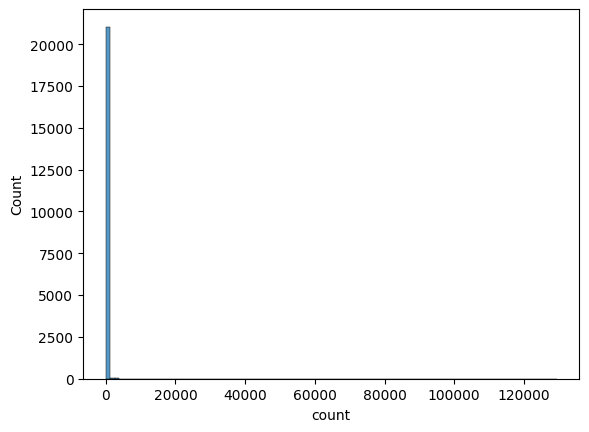

In [133]:
import seaborn as sns

sns.histplot(
    corpus_freq,
    x="count",
    bins=100
)

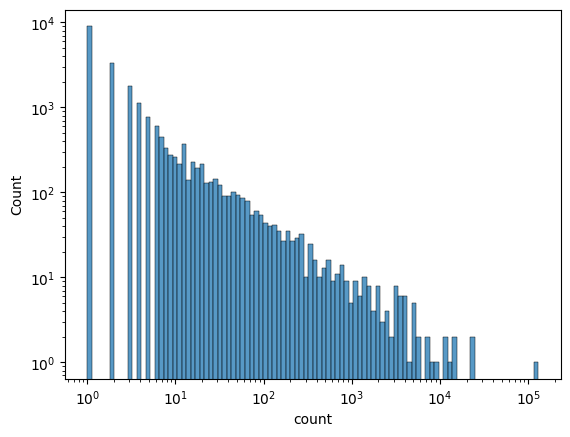

In [136]:
ax = sns.histplot(
    corpus_freq,
    x="count",
    bins=100,
    log_scale=True
)
ax.set_yscale("log")

### Part 2: Talkativity
**Q5**. For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [ ]:
# your code goes here
df["number_of_words"] = df["line"].str.len()
df

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_51103/2464482061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_words"] = df["line"].str.len()


,episode,scene,character,line,season,number_of_words
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...,1,279
1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point,1,26
2,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...,1,64
3,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me,1,10
5,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...,1,218
...,...,...,...,...,...,...
51284,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a coug...,10,112
51286,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,how thoughtful thank you,10,26
51288,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,and i with you question are you seeking a ro...,10,74
51290,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,well that would raise a number of problems w...,10,111


In [144]:
(
    df.groupby("character")
    .aggregate(
        {
            "number_of_words":"sum"
        }
    )
    .sort_values("number_of_words", ascending=False)
    
)

,number_of_words
character,
Sheldon,951257
Leonard,496904
Penny,381135
Howard,338077
Raj,293202
Amy,199048
Bernadette,132560
Stuart,37786
Mrs Cooper,16621


## Task D: The Detective's Hat

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high.

**Q6**. Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons.

In [ ]:
df

In [154]:
# your code goes here
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df.query("season <= 8")["line"])
X_test = vectorizer.transform(df.query("season > 8")["line"])
y_train = (df.query("season <= 8")["character"] == "Sheldon").astype(int).to_numpy()
y_test = (df.query("season > 8")["character"] == "Sheldon").astype(int).to_numpy()

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38177, 18952), (10169, 18952), (38177,), (10169,))

In [156]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7905398760940112

**Q7**. Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [191]:
# your code goes here
from collections import Counter
def count_words(character_lines:pd.Series)->set:
    return set(Counter(" ".join(character_lines).split()).keys())

X_train_raw = df.query("season <= 8")
words_per_character = X_train_raw.groupby("character").aggregate(
    {
        "line":[count_words]
    }
)
unique_sheldon_words = words_per_character.loc["Sheldon"].values[0]
for character in words_per_character.index.drop("Sheldon"):
    unique_sheldon_words = unique_sheldon_words.difference(
        words_per_character.loc[character].values[0]
    )
len(unique_sheldon_words)

5269

In [197]:
X_test_raw = df.query("season > 8")
X_test_raw["y_true"] = (df.query("season > 8")["character"] == "Sheldon").astype(int)

def is_it_sheldon(line:str)->int:
    return int(len(set(line.split(" ")).intersection(unique_sheldon_words)) > 0)

X_test_raw["y_pred"] = X_test_raw["line"].apply(
    is_it_sheldon
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_51103/944037495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_raw["y_true"] = (df.query("season > 8")["character"] == "Sheldon").astype(int)
/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_51103/944037495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_raw["y_pred"] = X_test_raw["line"].apply(


In [198]:
accuracy_score(X_test_raw["y_true"], X_test_raw["y_pred"])

0.7698888779624349